In [16]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [23]:
highLumi = pd.read_hdf("data_highLumi_pt_1000_1200.h5")
lowLumi = pd.read_hdf("data_lowLumi_pt_1000_1200.h5")
print(lowLumi.keys())
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
background = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
signal = pickle.load(file2)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


#### 1. High luminosity data
For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.

Evaluate observed significance and compare your results to expectation.

Significance of inf for a cut from 0.0 to 22000.0


C:\Users\agiedd\Anaconda2\envs\py36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


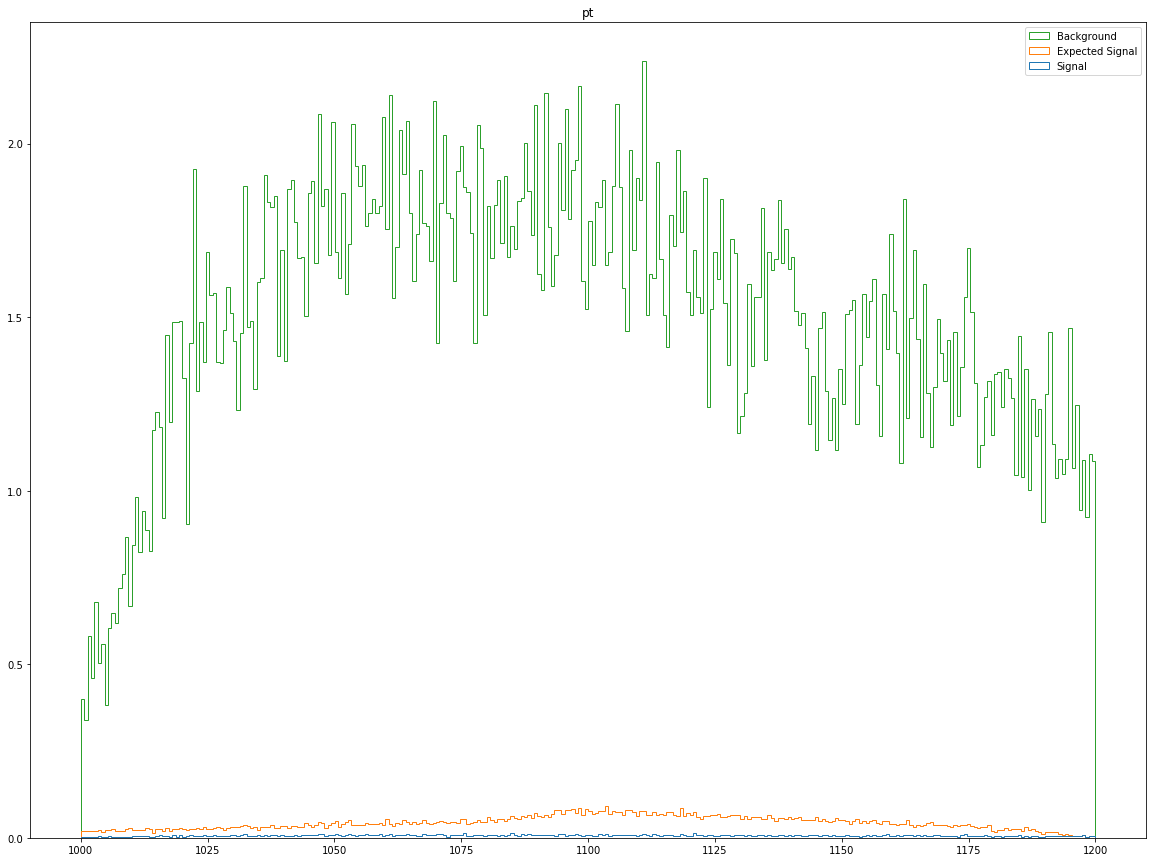

Significance of inf for a cut from 0.0 to 22000.0


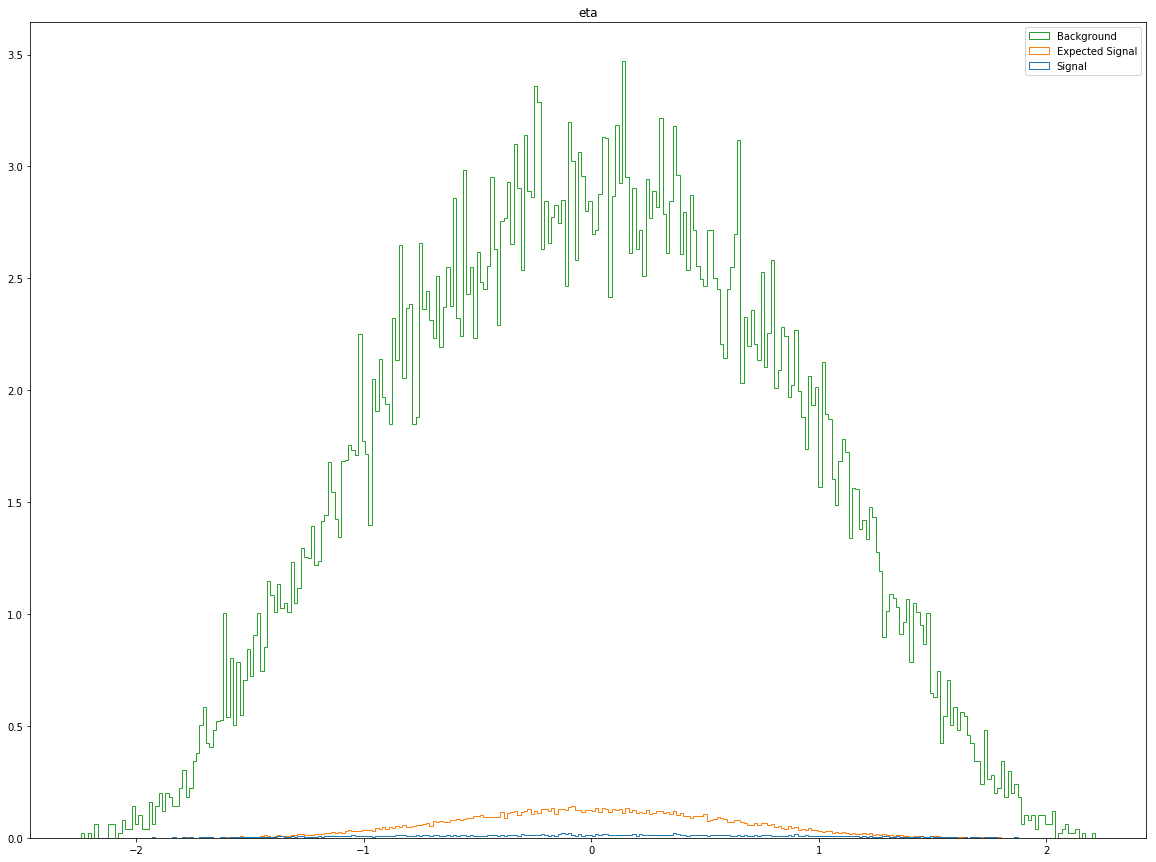

Significance of inf for a cut from 0.0 to 22000.0


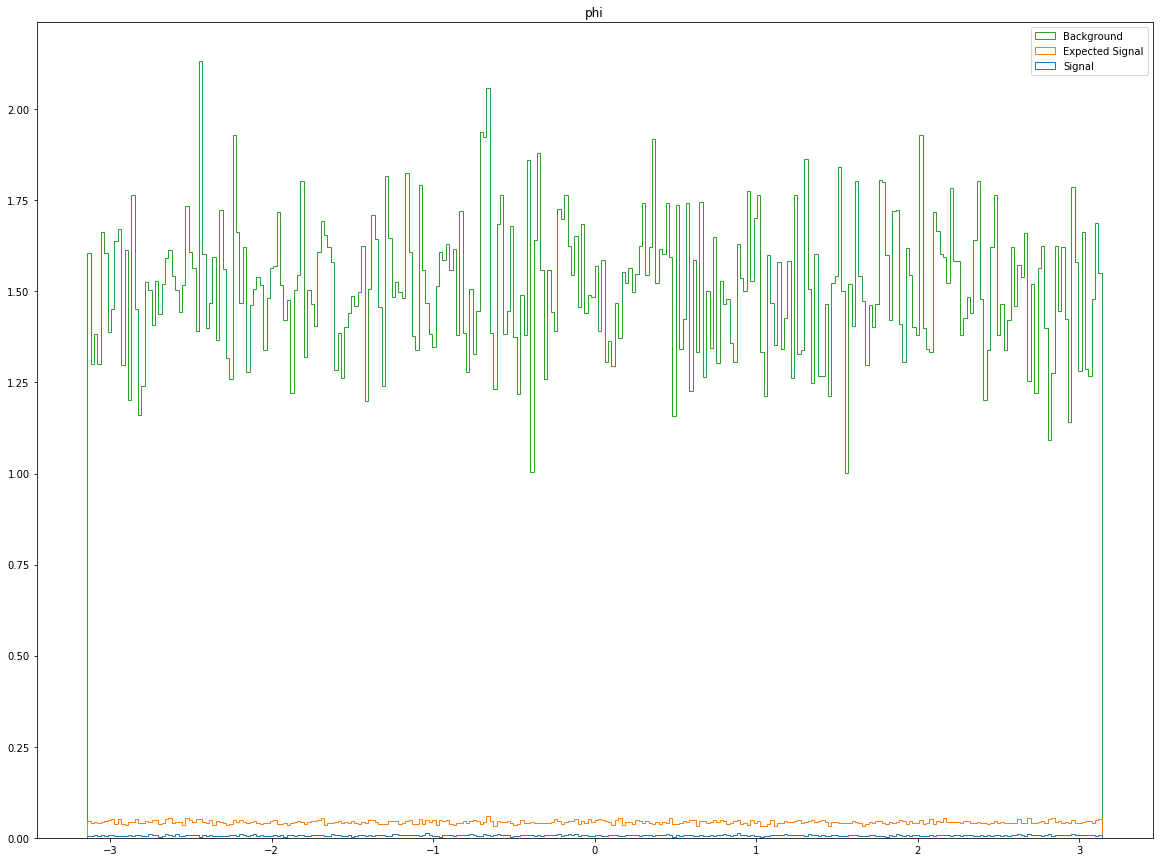

Significance of inf for a cut from 0.0 to 22000.0


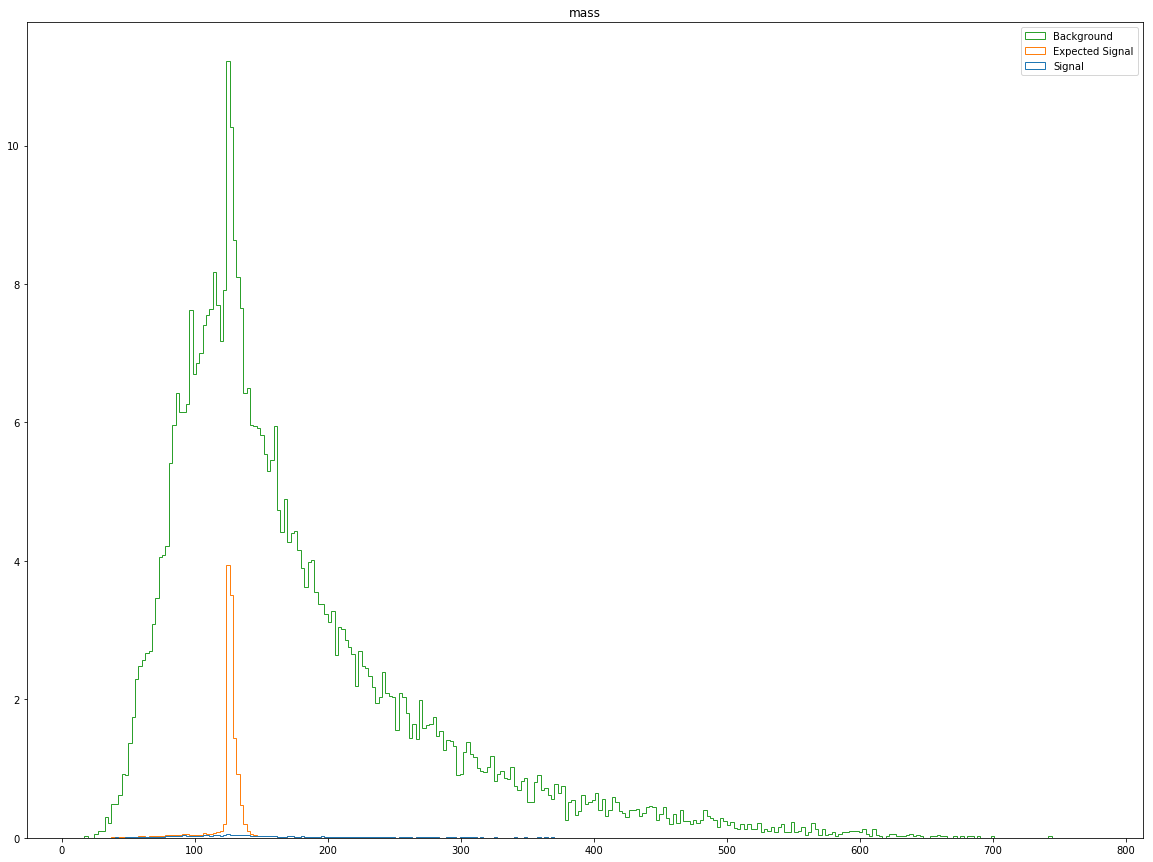

Significance of inf for a cut from 0.0 to 22000.0


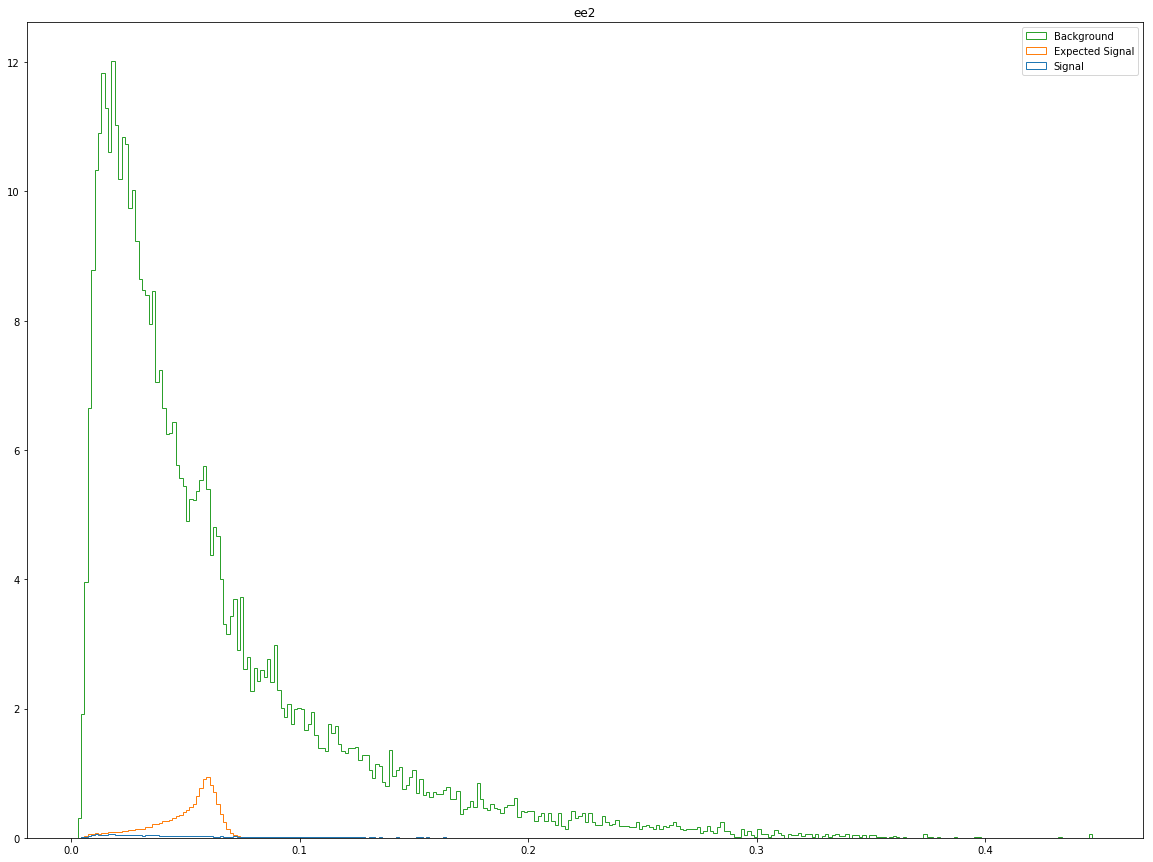

Significance of inf for a cut from 0.0 to 22000.0


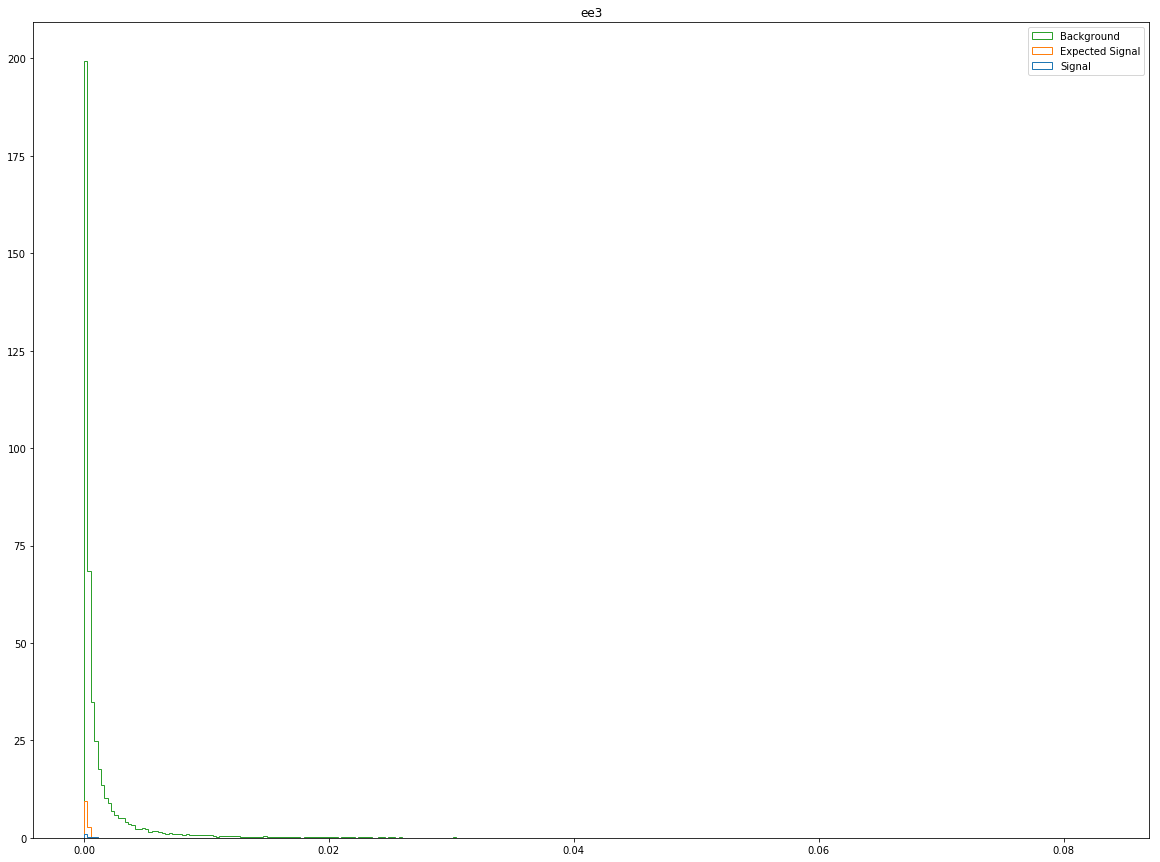

Significance of inf for a cut from 0.0 to 22000.0


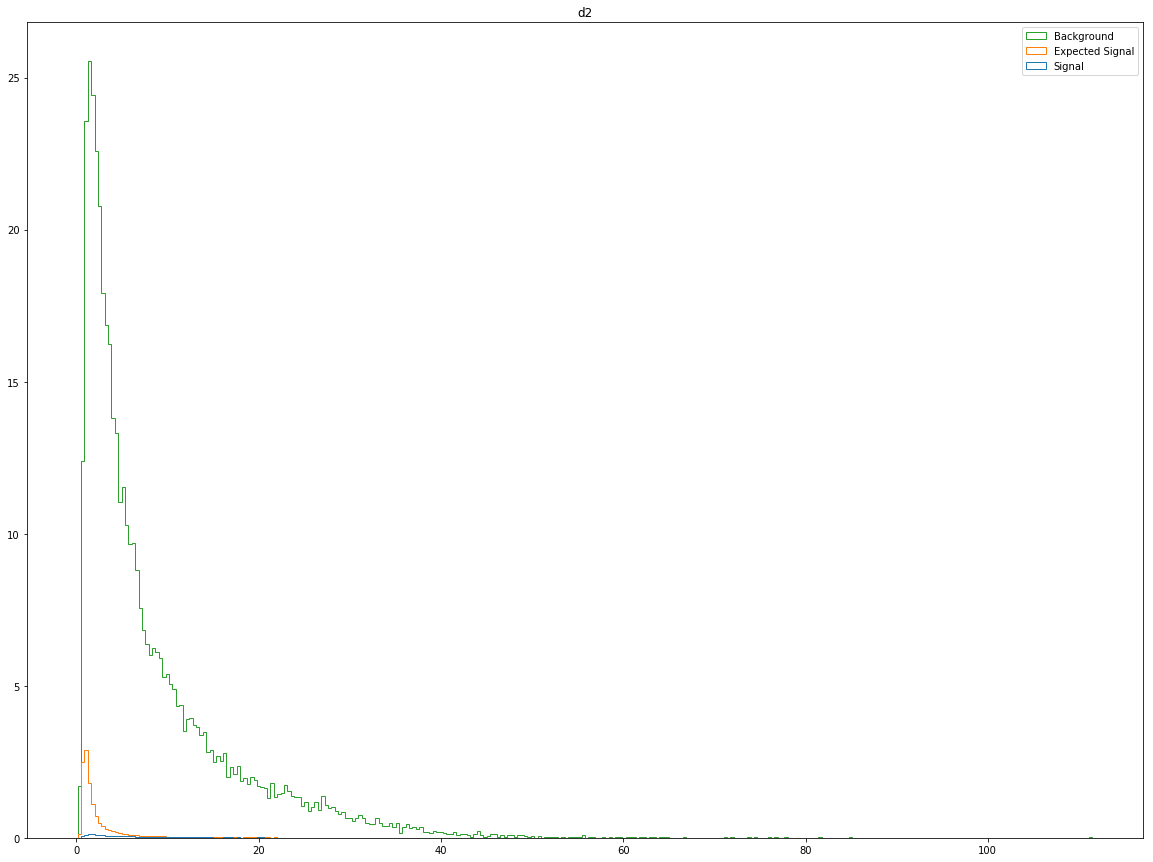

Significance of inf for a cut from 0.0 to 22000.0


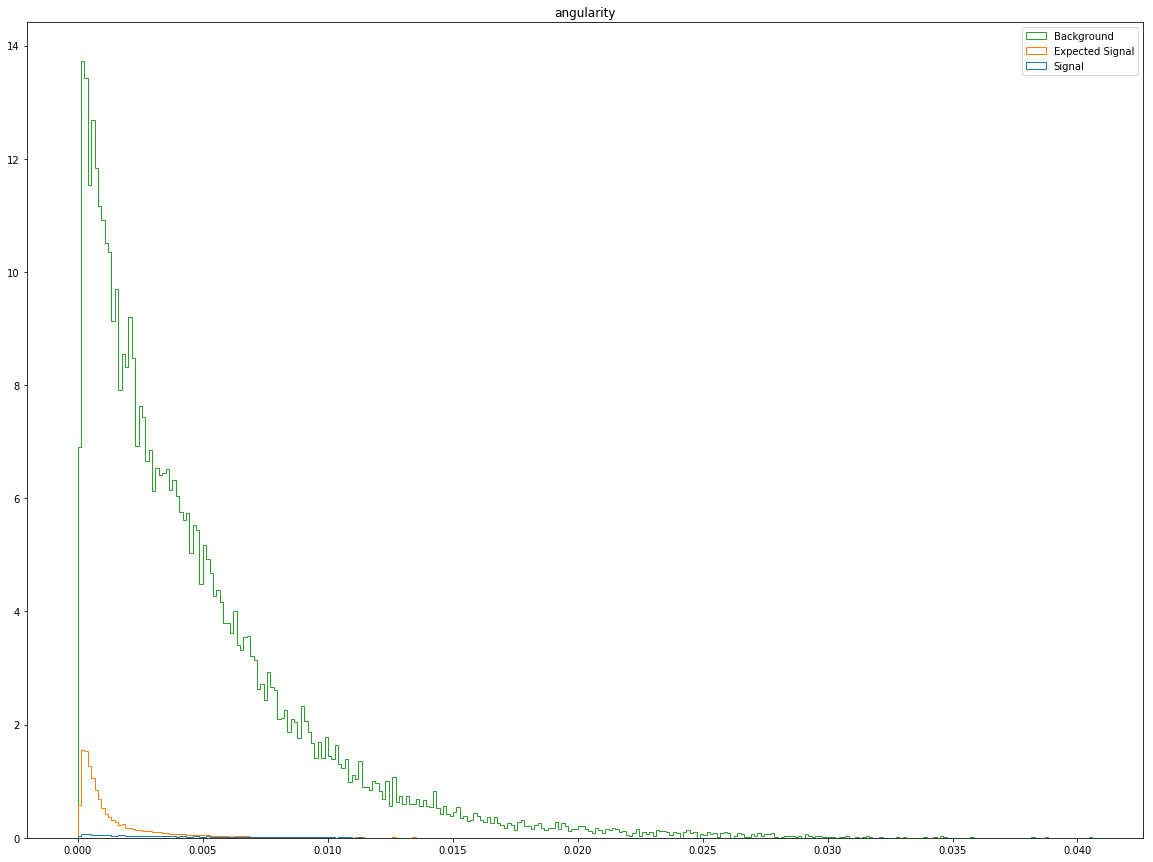

Significance of inf for a cut from 0.0 to 22000.0


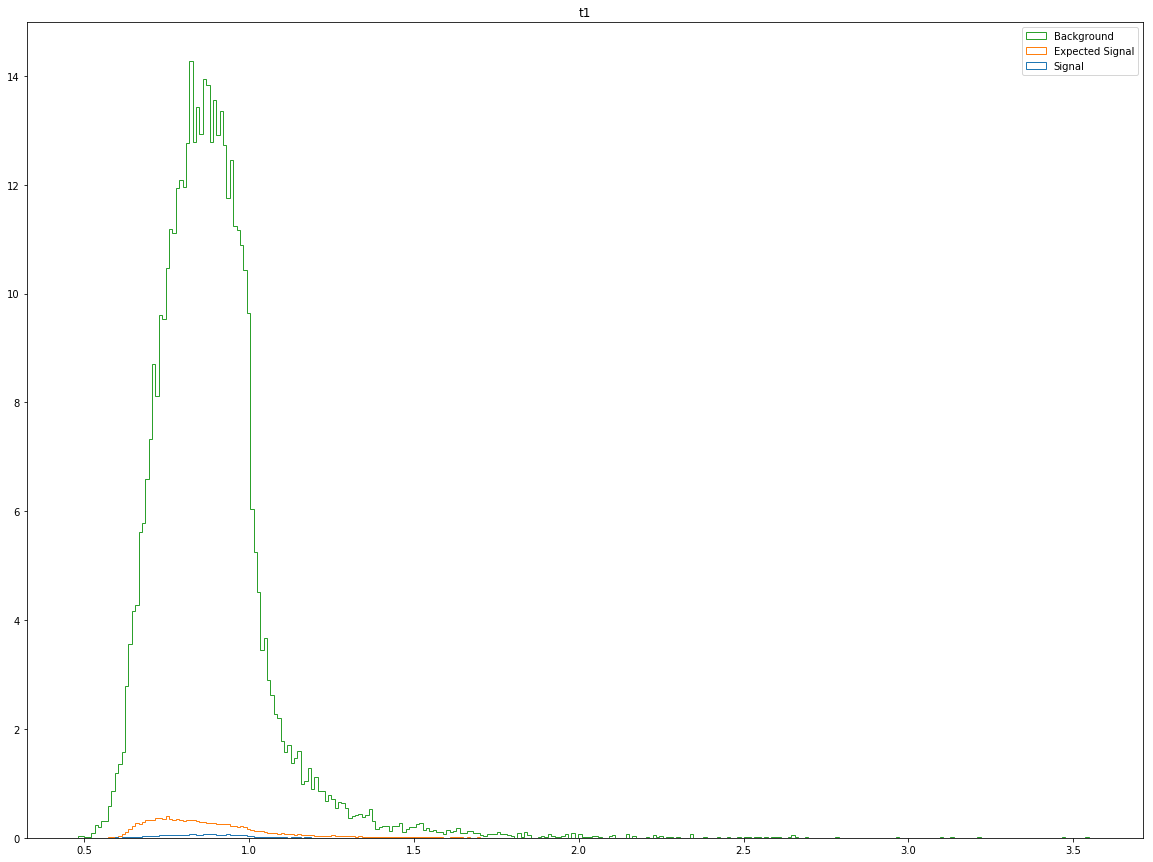

Significance of inf for a cut from 0.0 to 22000.0


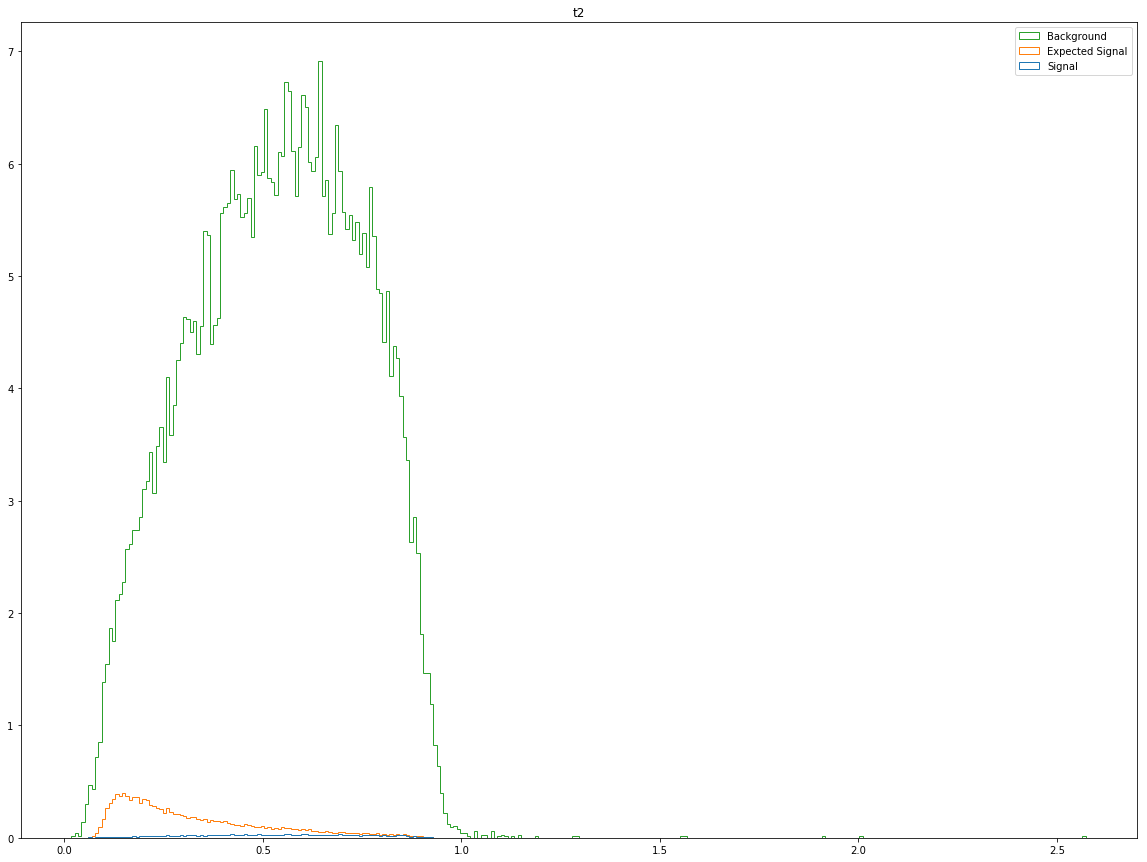

Significance of inf for a cut from 0.0 to 22000.0


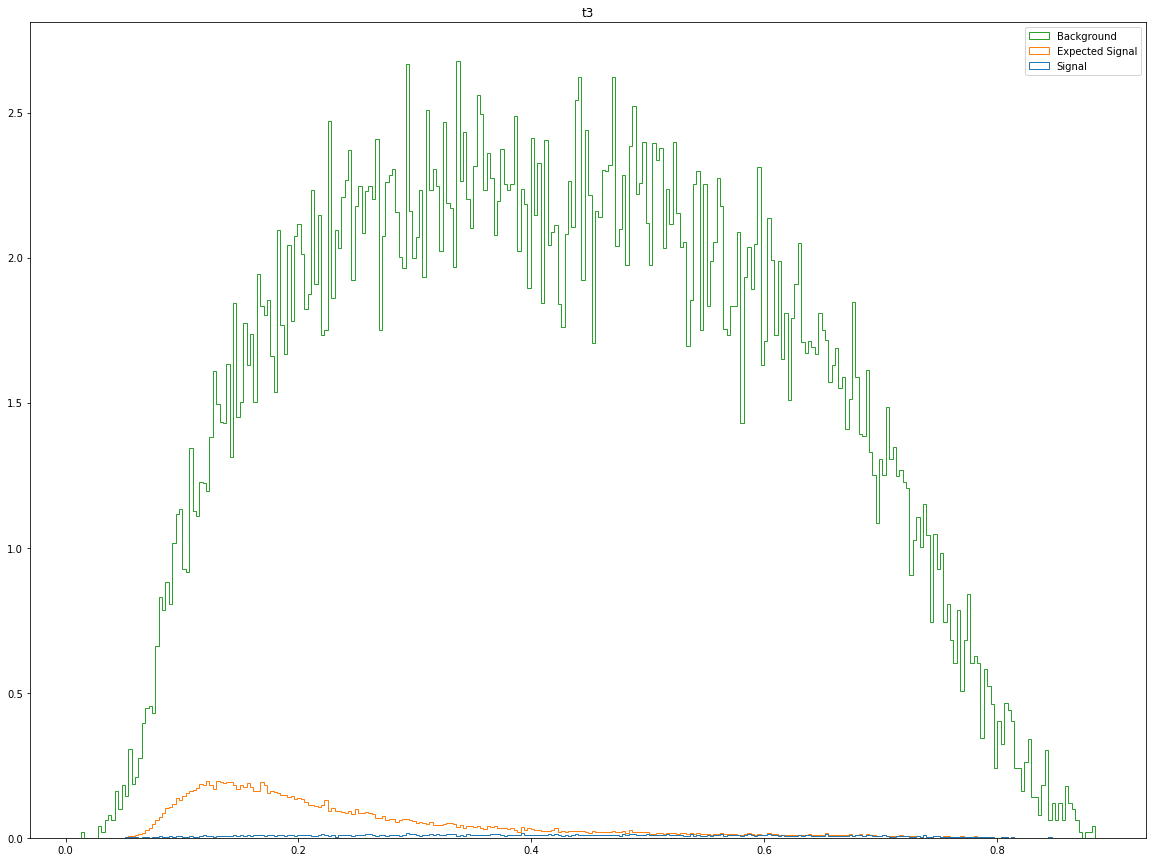

Significance of inf for a cut from 0.0 to 22000.0


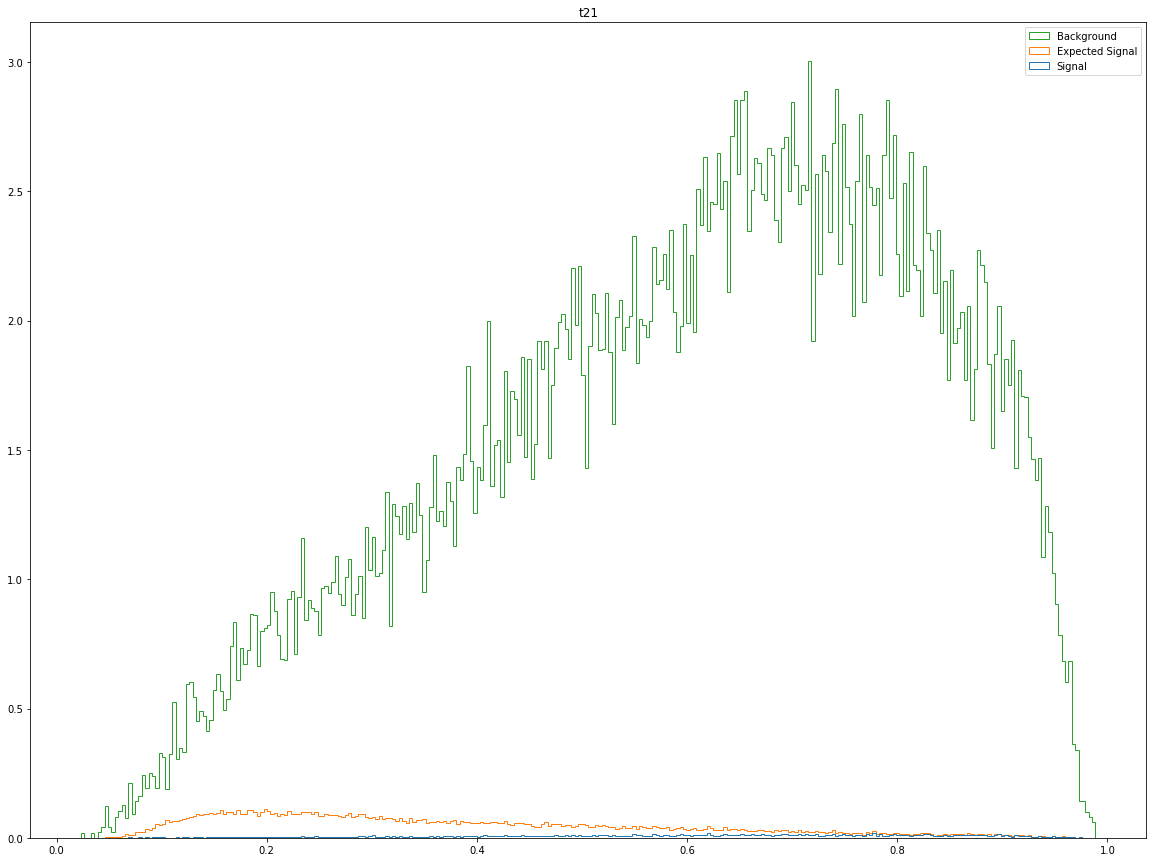

Significance of inf for a cut from 0.0 to 22000.0


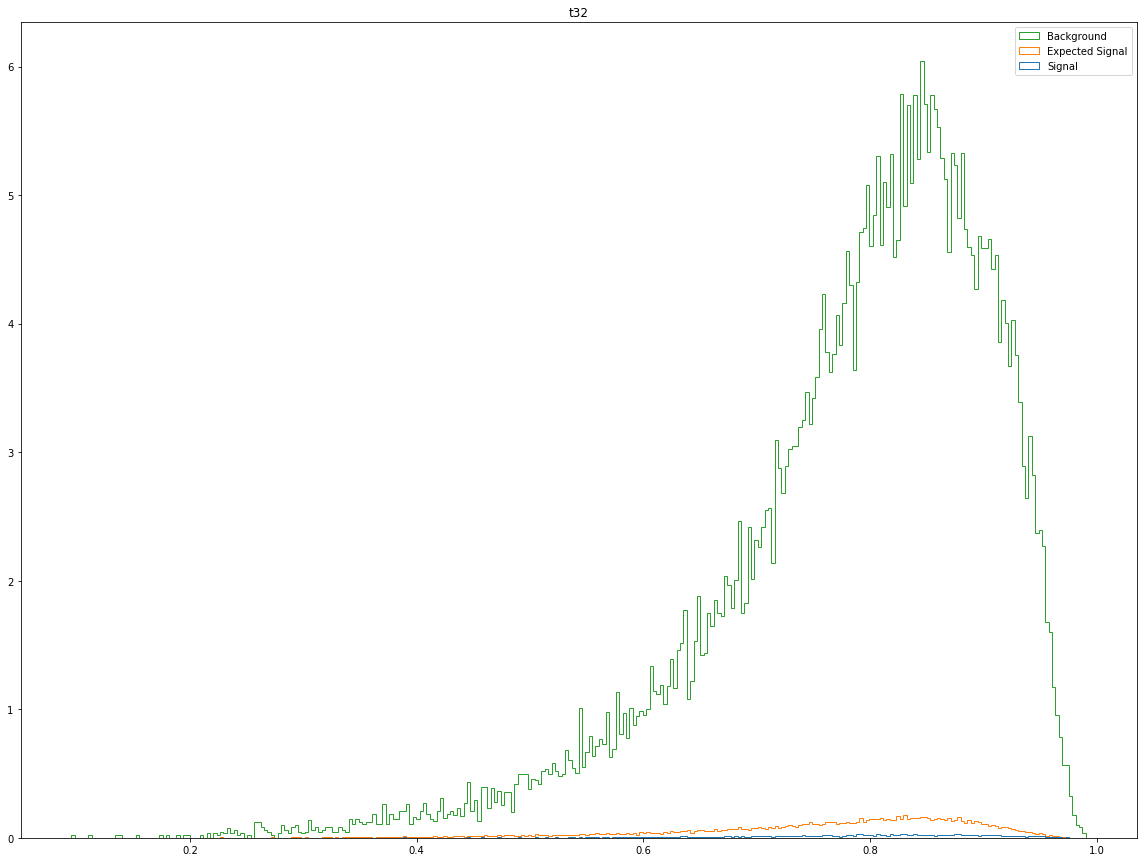

Significance of inf for a cut from 0.0 to 22000.0


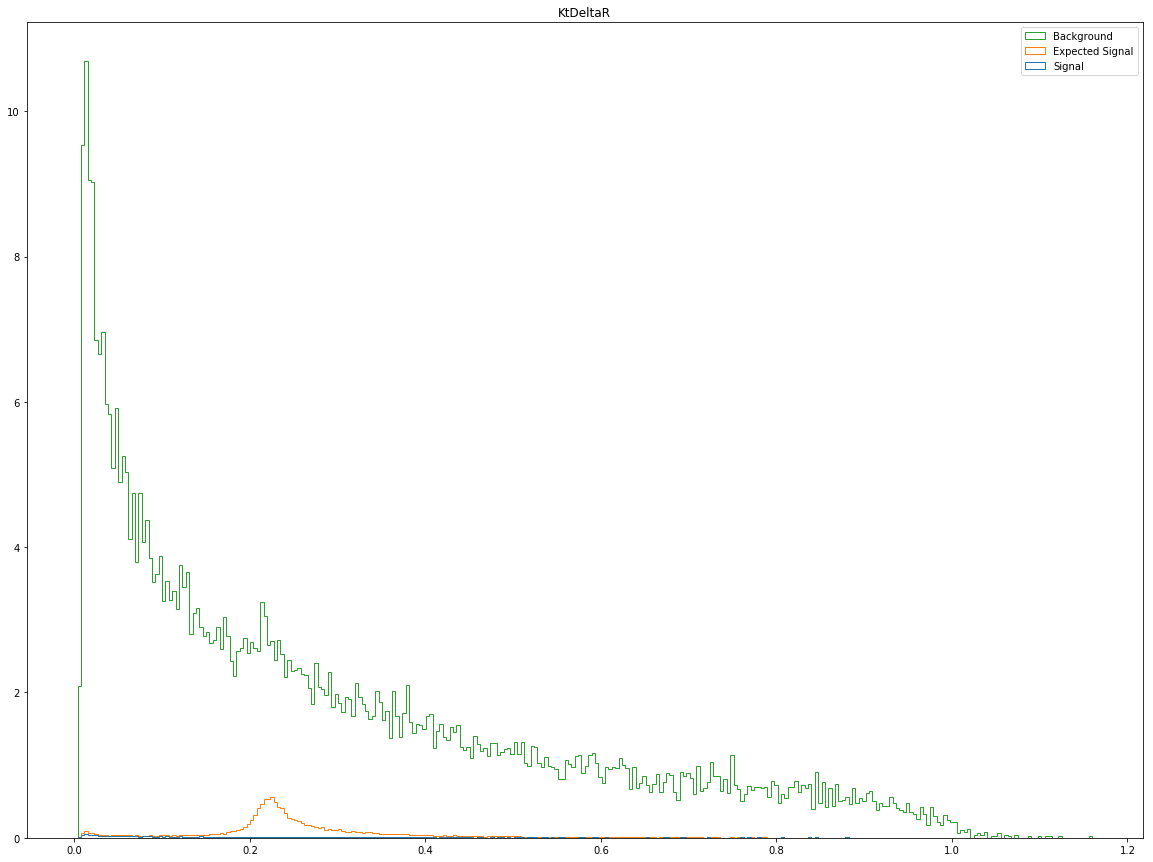

In [26]:
def slicer(lower, upper, key, signal, bkgd, expected):
    bkgd_n = bkgd[key]
    signal_n = signal[key]
    expected_n = expected[key]
    bkgd_slice = bkgd_n[lower:upper:1]
    signal_slice = signal_n[lower:upper:1]
    exp_signal_slice = expected_n[lower:upper:1]
    
    bkgd_avg = 200000 * len(bkgd_slice)/len(bkgd_n)
    signal_avg = 5000 * len(signal_slice)/len(signal_n)
    exp_signal_avg = 5000 * len(signal_slice)/len(expected_n)
    
    p = (1-scipy.stats.poisson.cdf(bkgd_avg + signal_avg, bkgd_avg))
    print('Significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),lower,upper))

    return(signal_slice, exp_signal_slice, bkgd_slice)

def plotWithCuts(key):
    signal_slice, exp_signal_slice, background_slice = slicer(0, 22000, key, highLumi, background, signal)
    x= [signal_slice, exp_signal_slice, background_slice]
    dataweights = [[.0005]*len(signal_slice), [.0005]*len(exp_signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal", "Expected Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 2. Low luminosity data
Do as before with the high luminosity data and comment on the difference.

Significance of inf for a cut from 0.0 to 22000.0


C:\Users\agiedd\Anaconda2\envs\py36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


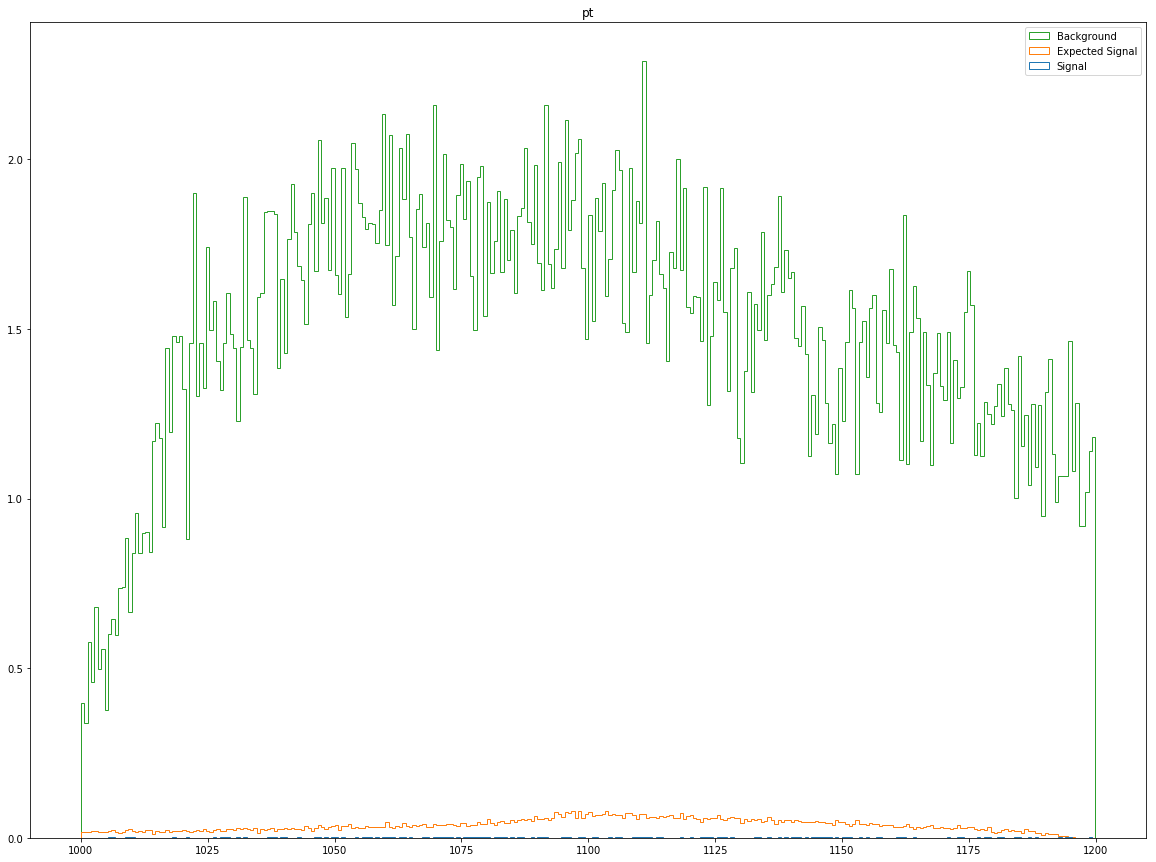

Significance of inf for a cut from 0.0 to 22000.0


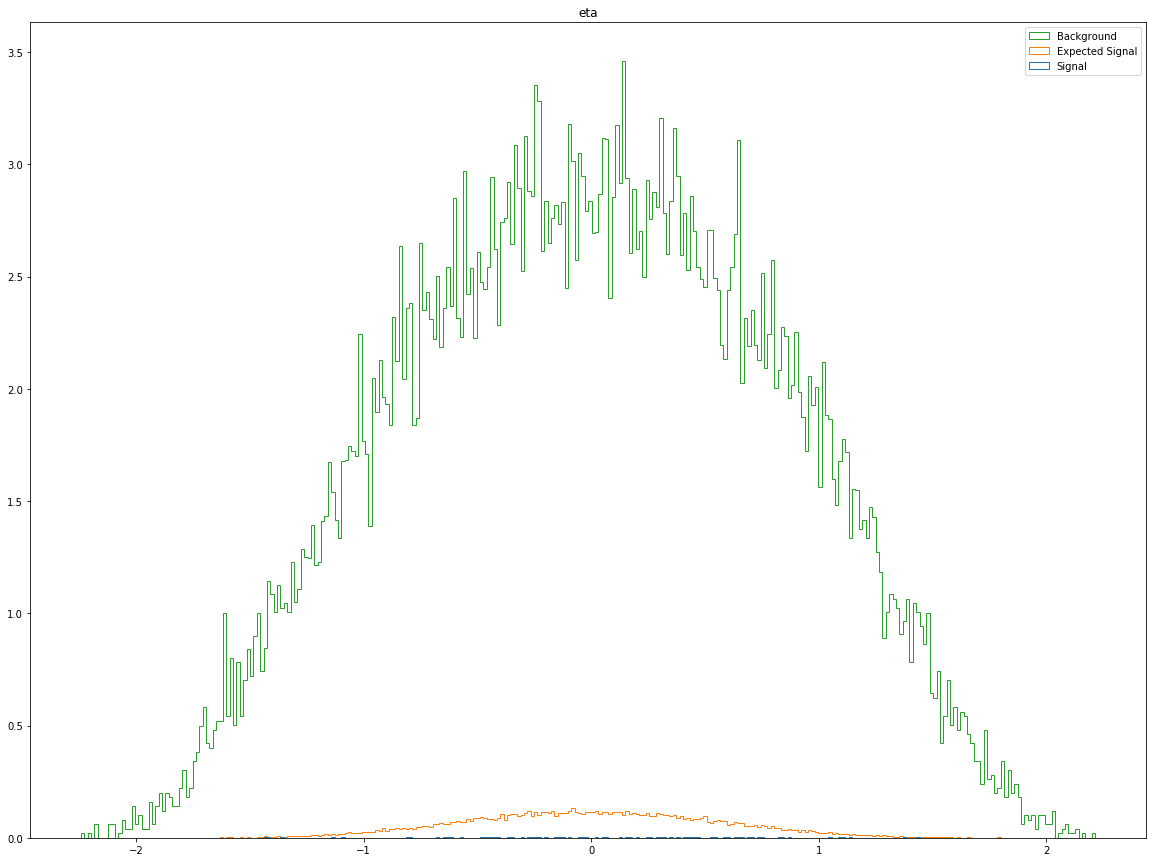

Significance of inf for a cut from 0.0 to 22000.0


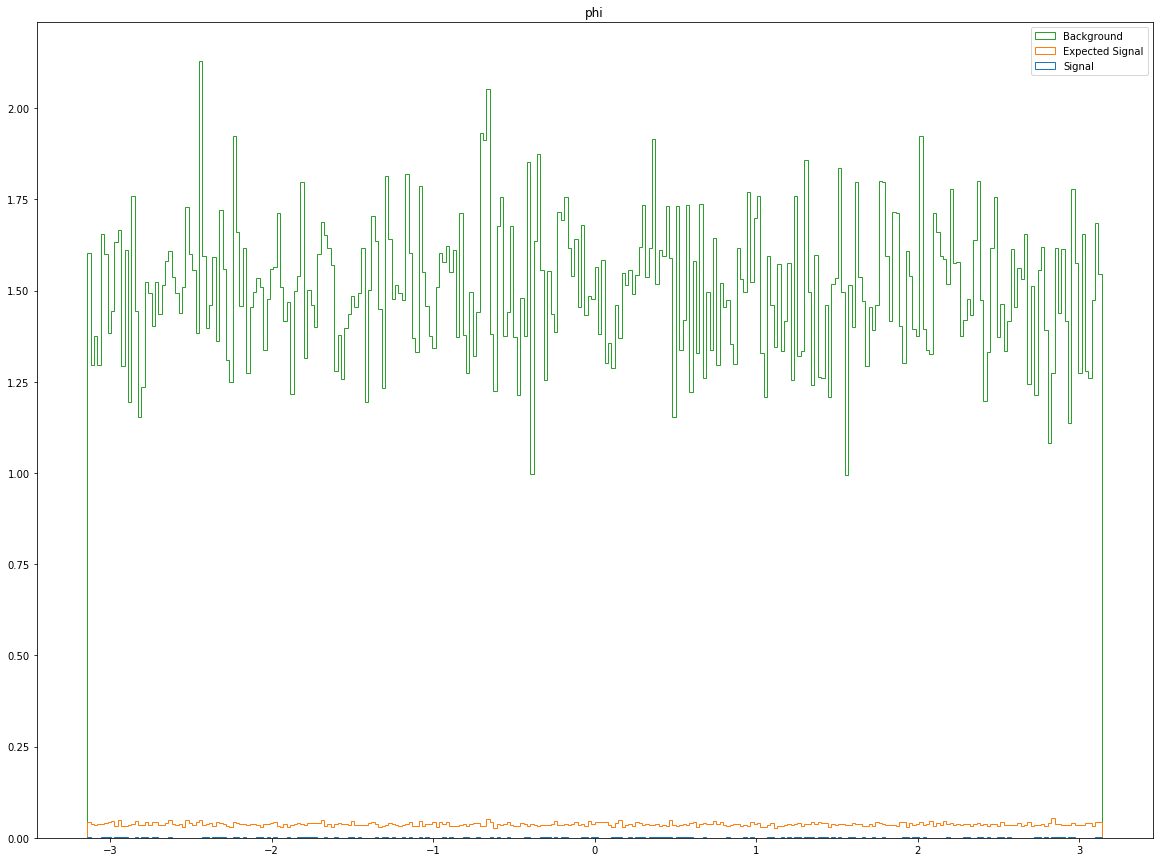

Significance of inf for a cut from 0.0 to 22000.0


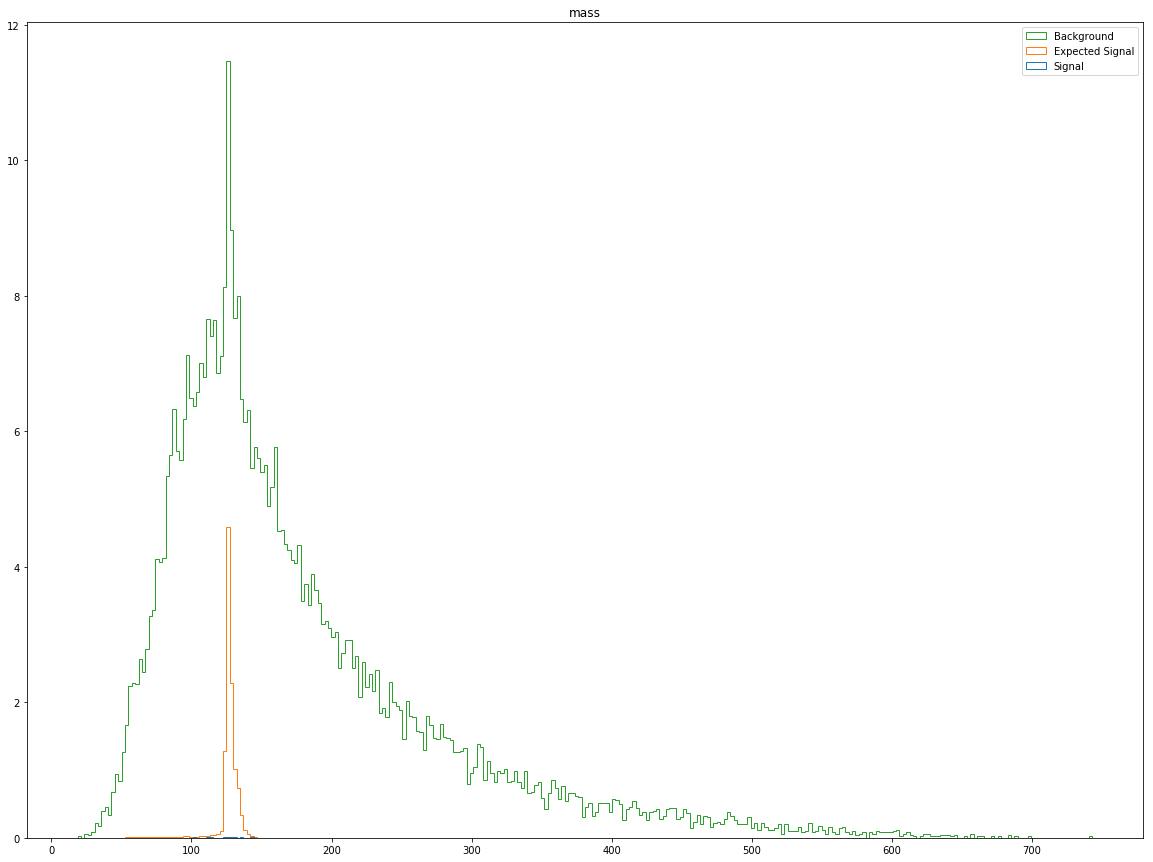

Significance of inf for a cut from 0.0 to 22000.0


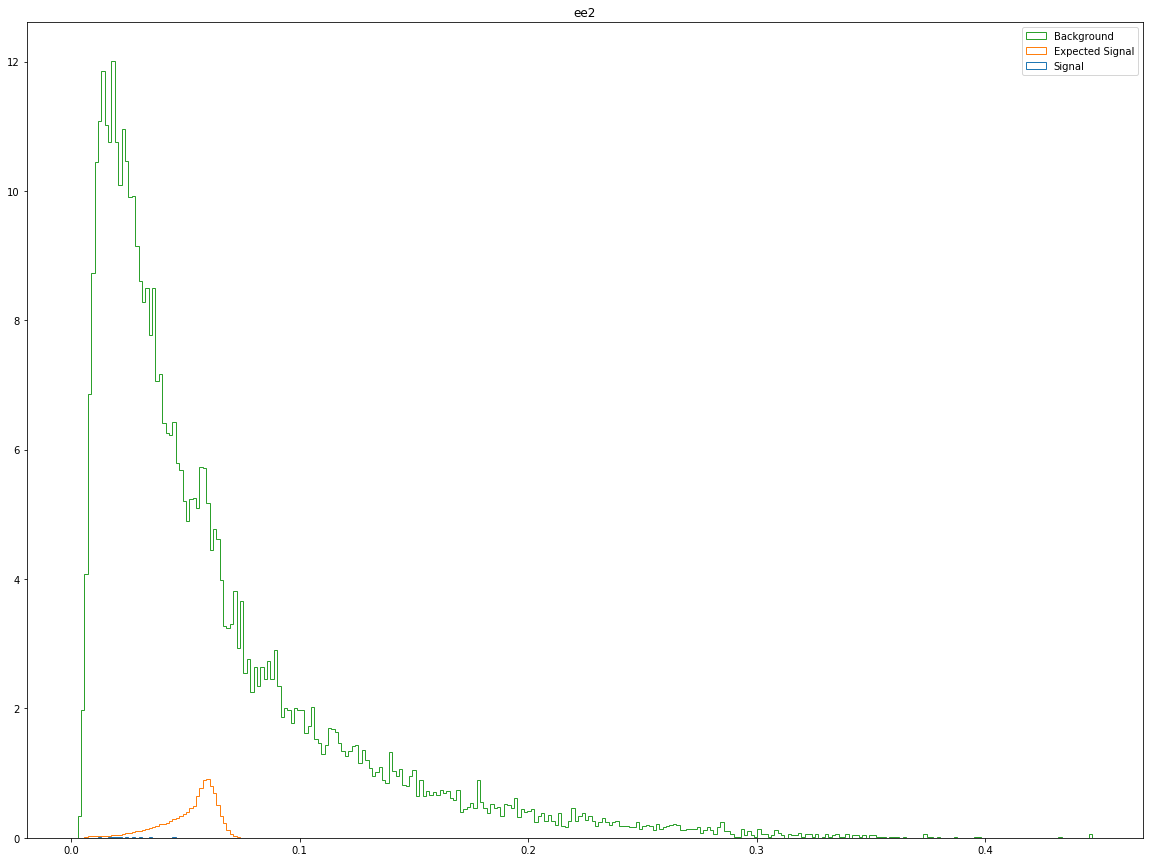

Significance of inf for a cut from 0.0 to 22000.0


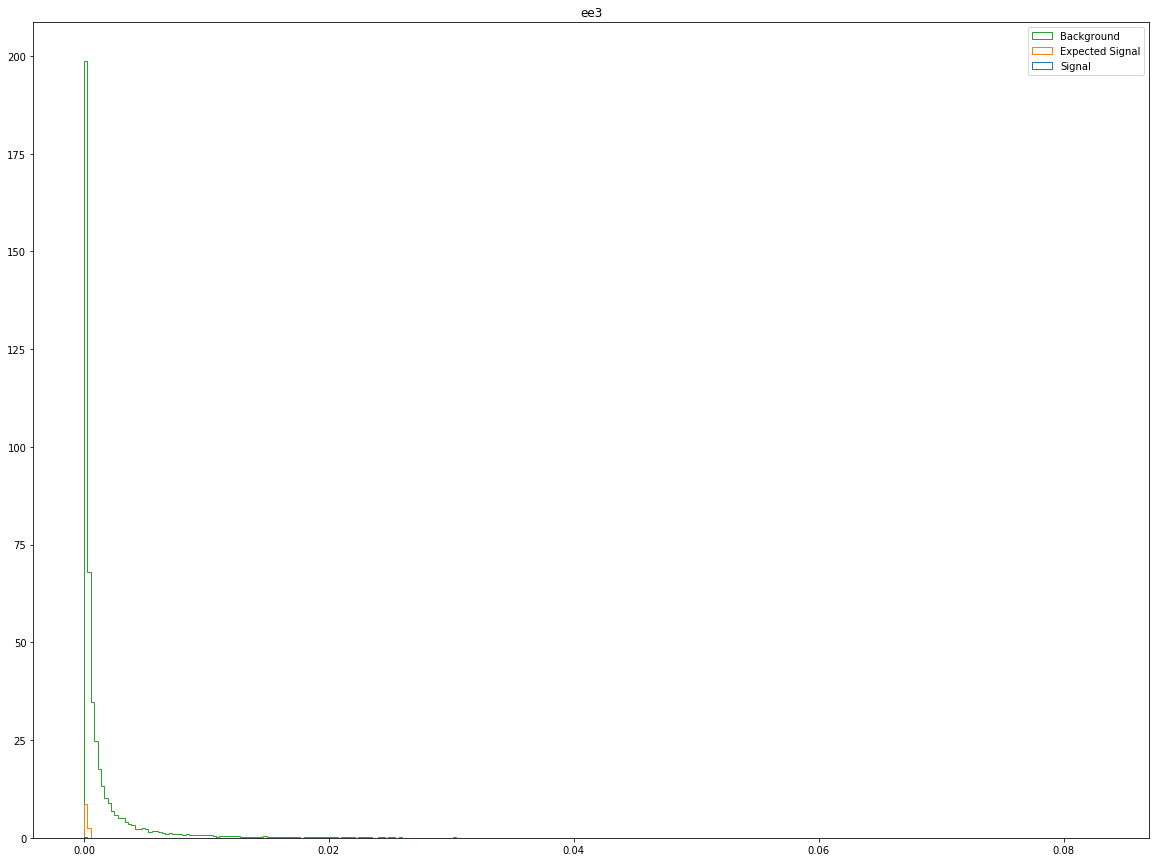

Significance of inf for a cut from 0.0 to 22000.0


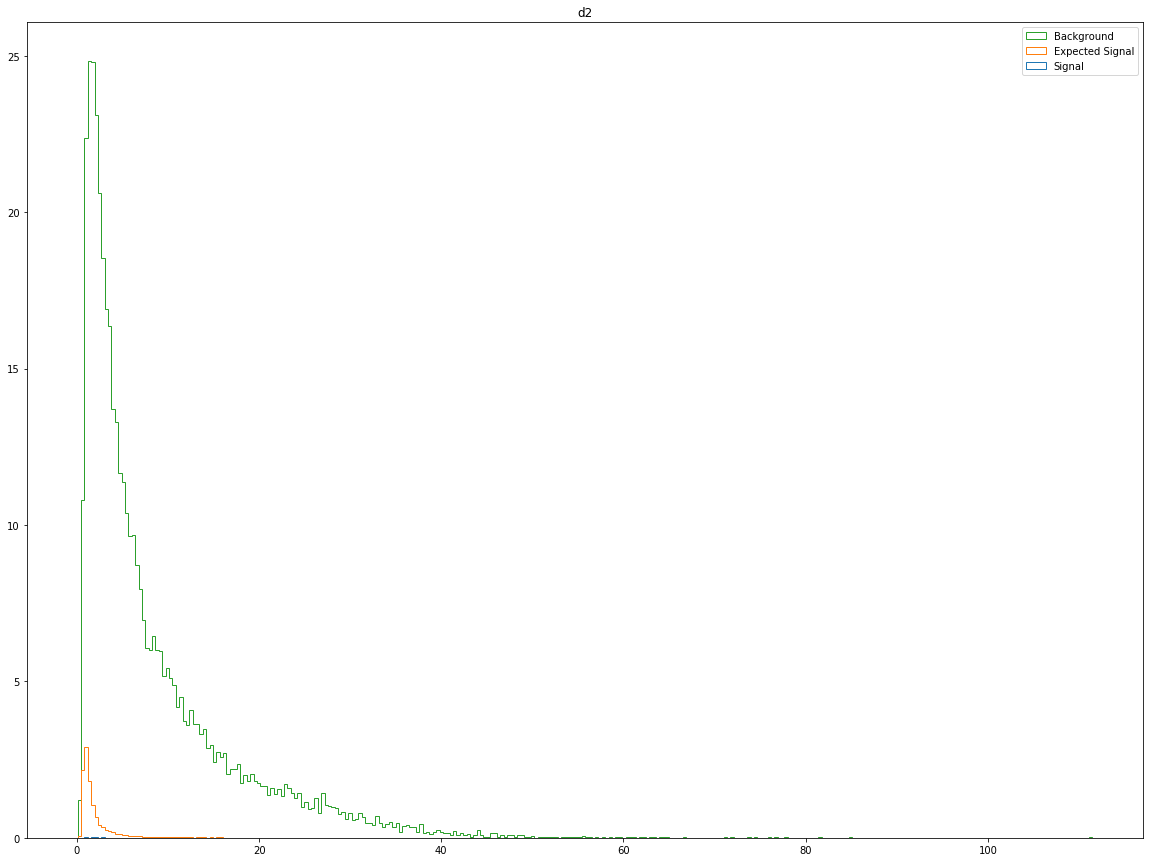

Significance of inf for a cut from 0.0 to 22000.0


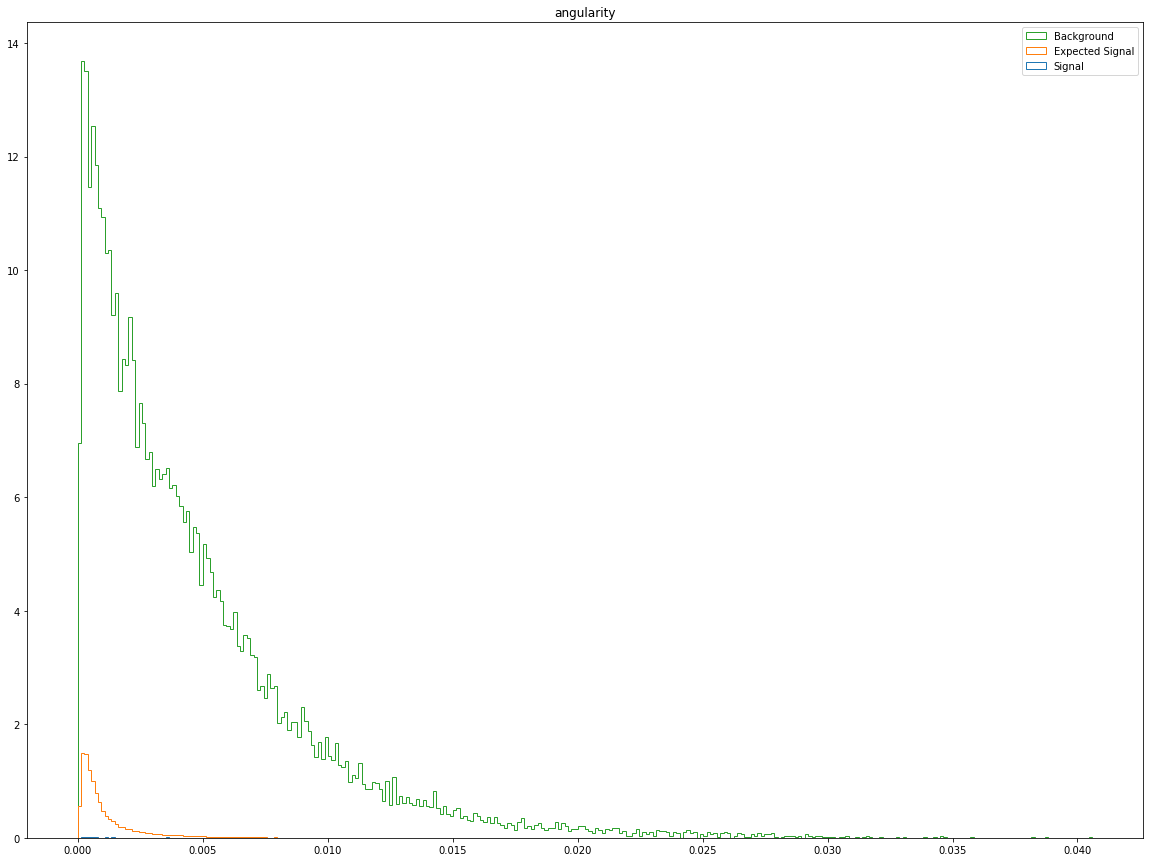

Significance of inf for a cut from 0.0 to 22000.0


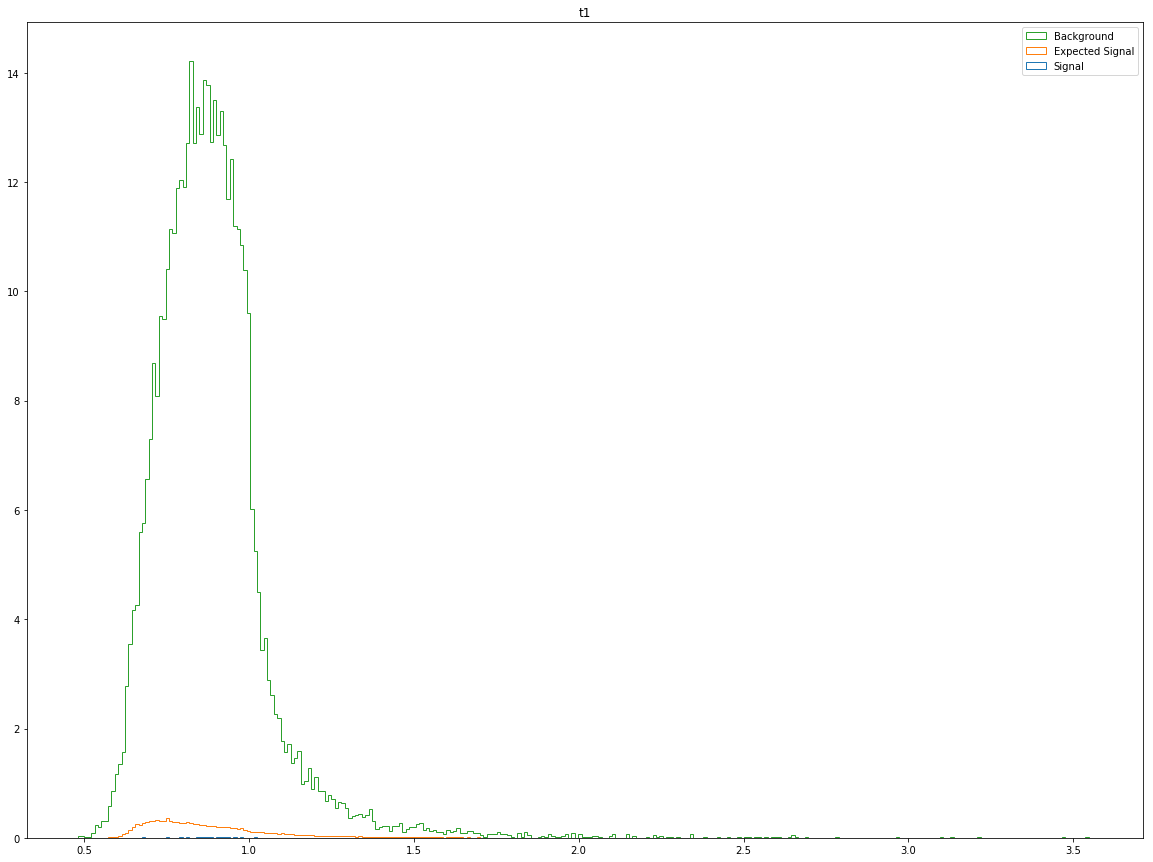

Significance of inf for a cut from 0.0 to 22000.0


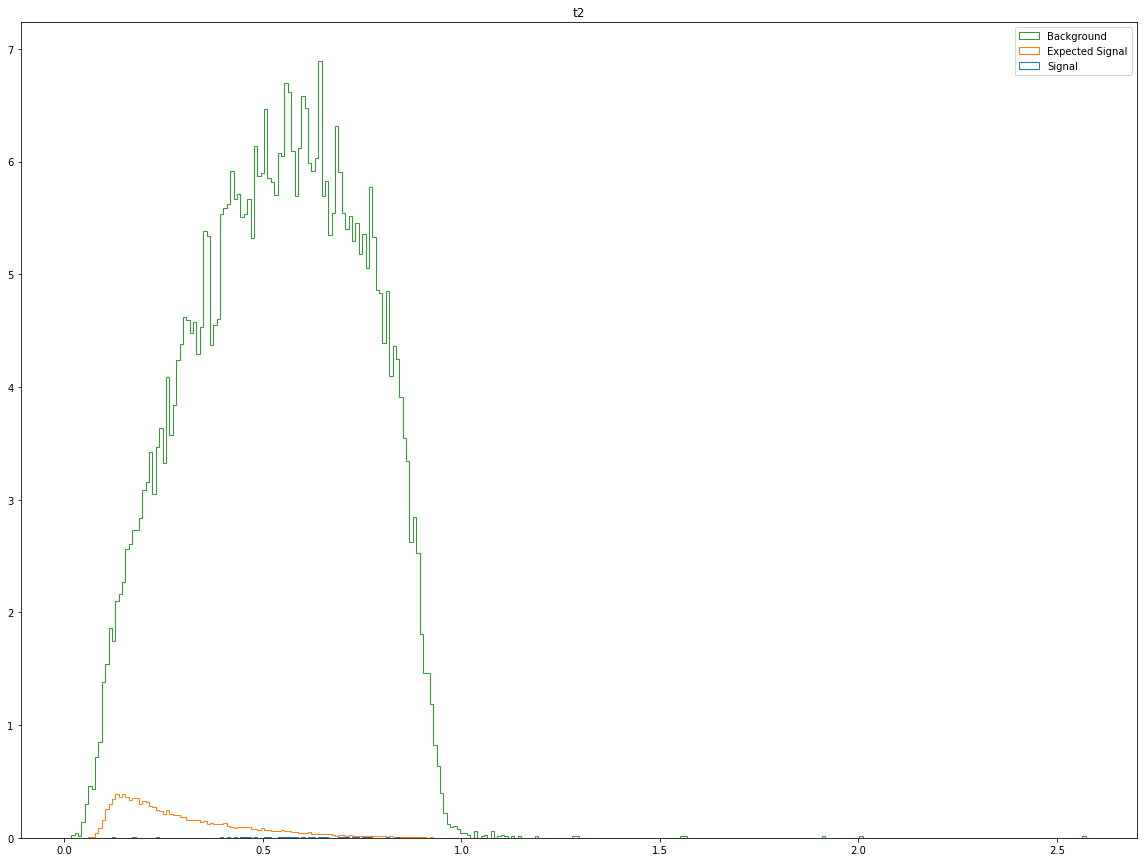

Significance of inf for a cut from 0.0 to 22000.0


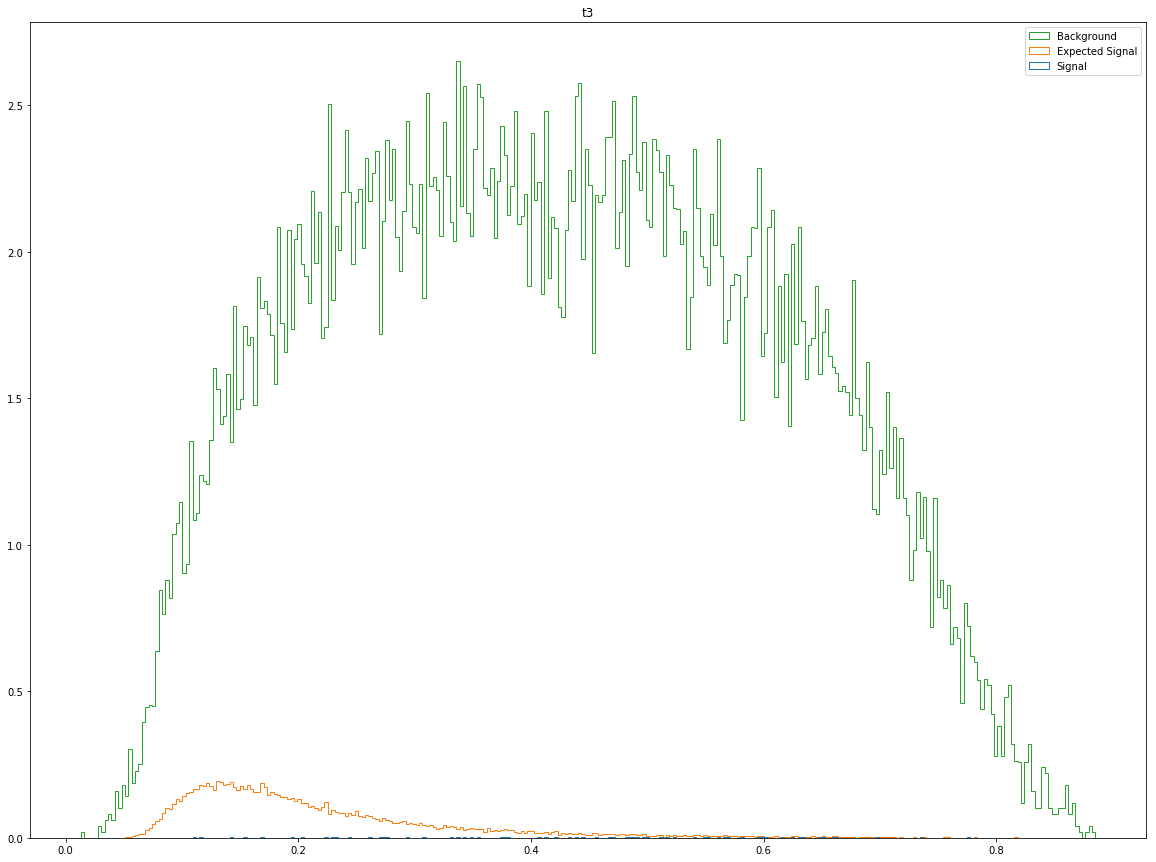

Significance of inf for a cut from 0.0 to 22000.0


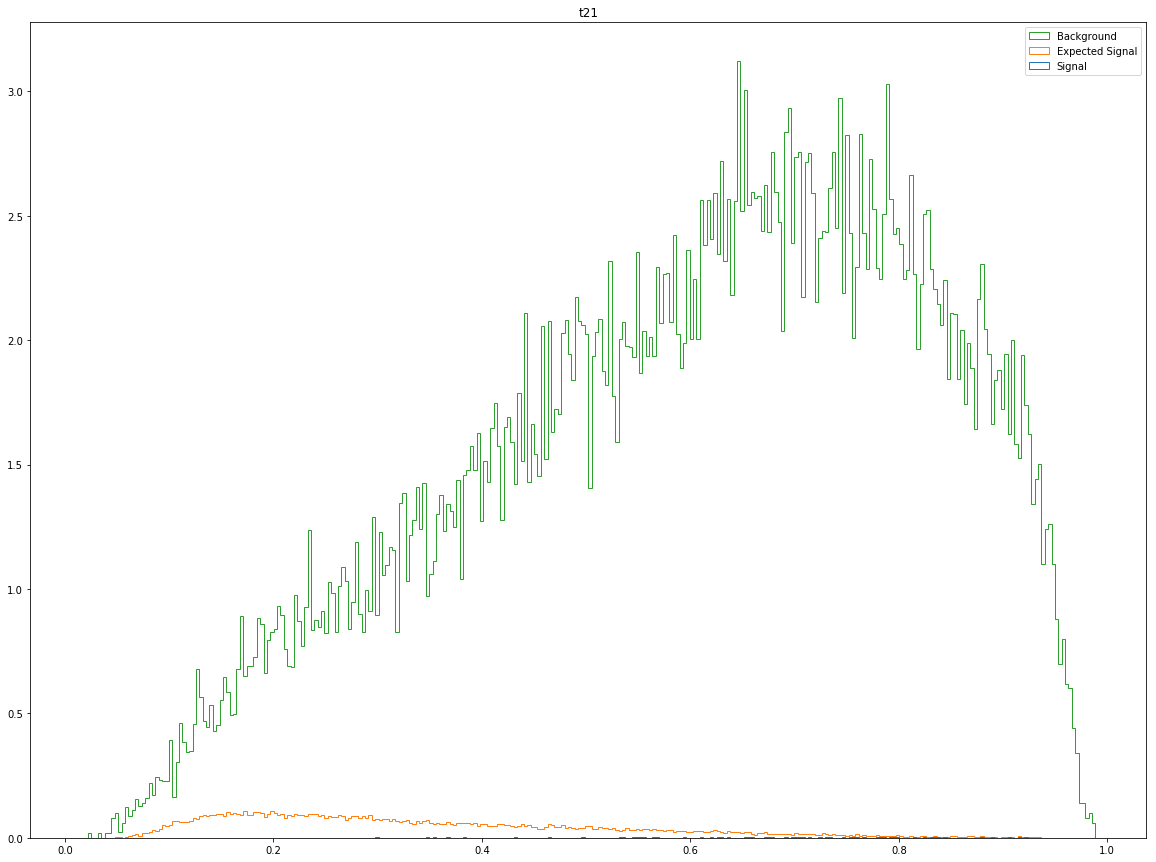

Significance of inf for a cut from 0.0 to 22000.0


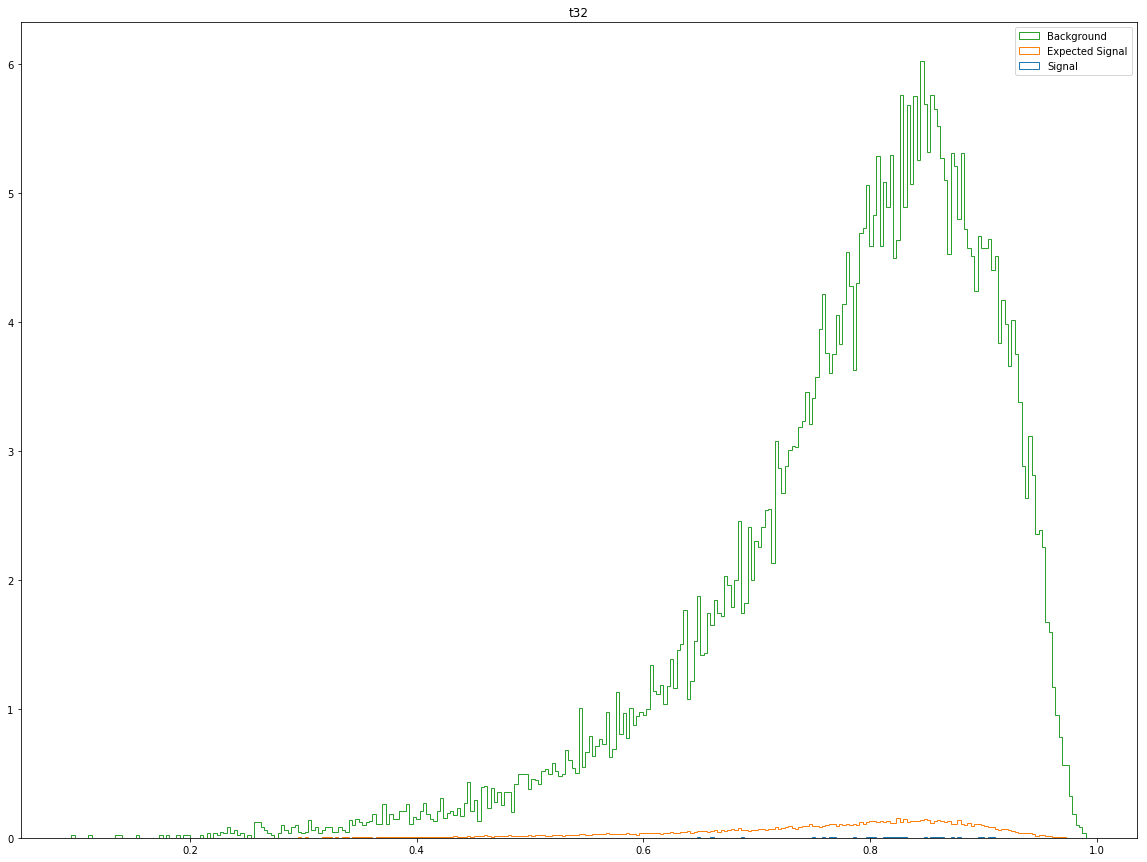

Significance of inf for a cut from 0.0 to 22000.0


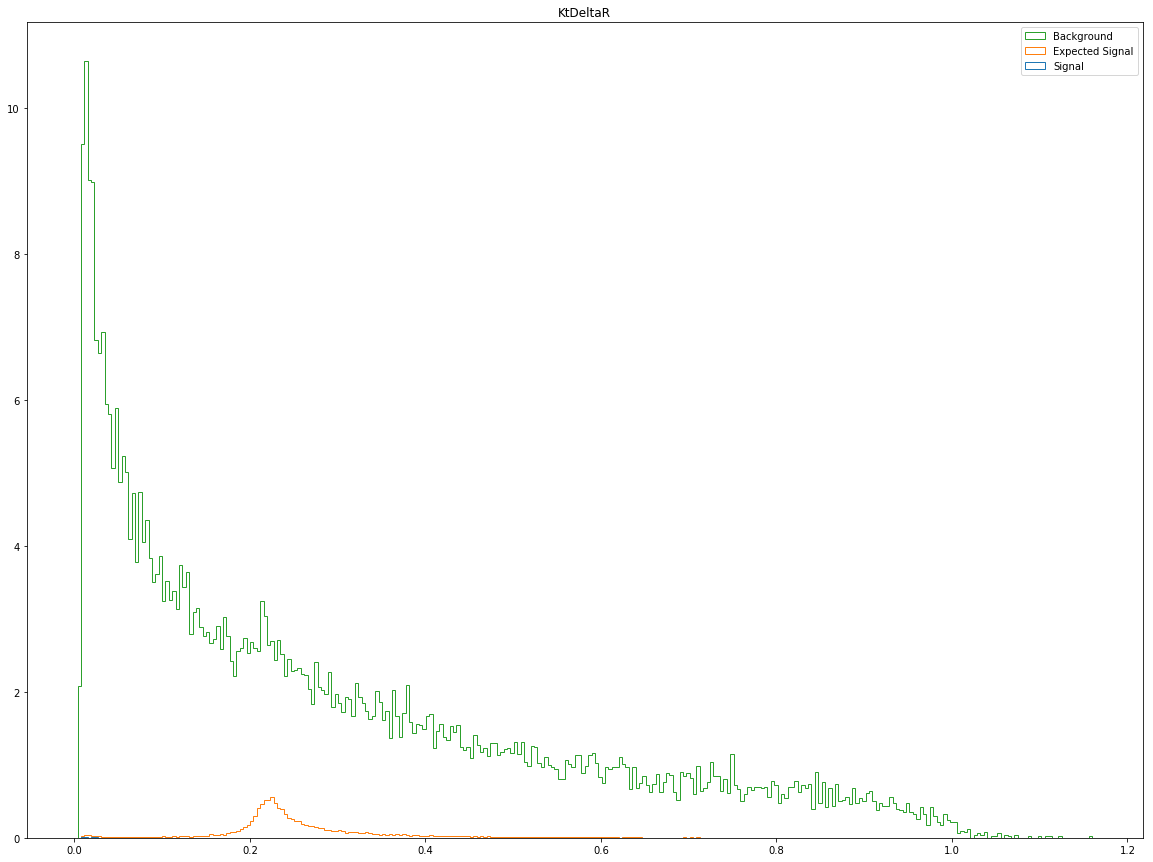

In [27]:
def plotWithCuts(key):
    signal_slice, exp_signal_slice, background_slice = slicer(0, 22000, key, lowLumi, background, signal)
    x= [signal_slice, exp_signal_slice, background_slice]
    dataweights = [[.0005]*len(signal_slice), [.0005]*len(exp_signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal", "Expected Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 3. 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.

Evaluate the expected 95% confidence level upper limit

Evaluate the observed 95% confidence level upper limit

Compare expectation to observation. Comment on your finding.

#### 4. Bonus:

Evalute the 1σ  uncertainty of the expected 95% confidence level upper limit.